# Programming Session 1 - Introduction to Supervised  and Unsupervised Learning 

The Objective of this session is to create a Machine Learning Model to predict the labels of the MNIST dataset

In [0]:
# Access files from Google Drive
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


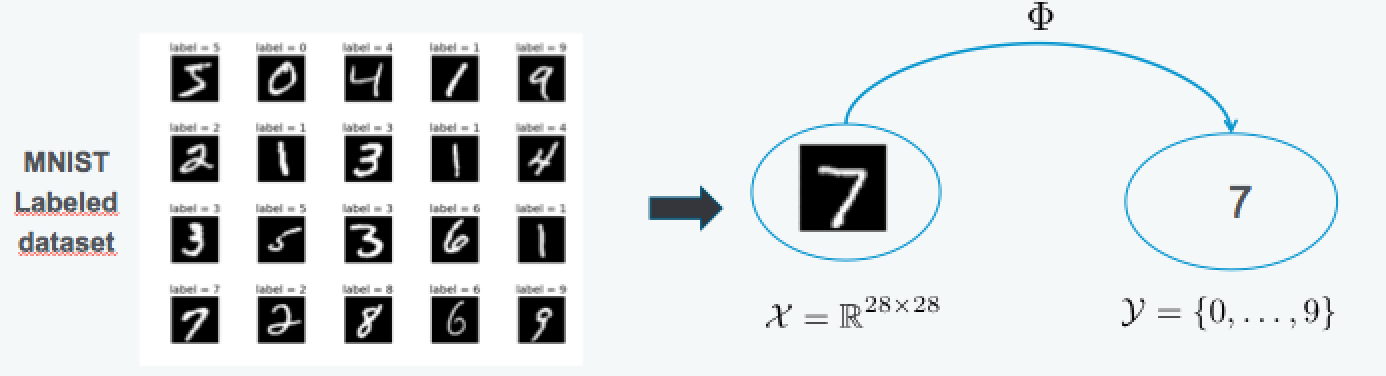

In [0]:
from IPython.display import Image # for showing graphs from the lectures
Image(filename='./gdrive/My Drive/Colab Notebooks/Programming_Session_1/images/Objective.png',  width=1000) 

Outline 

- [How to use Pipelines](#How-to-use-Pipelines)
  - [Importing basic libraries](#Importing-basic-libraries)
  - [Loading the MNIST dataset](#Loading-the-MNIST-dataset)
  - [Unsupervised Learning](#Unsupervised-Learning)
  - [Combining transformers and classifiers in a pipeline](#Combining-transformers-and-classifiers-in-a-pipeline)
- [Fine tuning the models via grid search](#Fine-tuning-the-models-via-grid-search)
  - [Model Performance using K flod cross validation](#Model-Pergormance-using-K-flod-cross-validation)
  - [Optimizing Hyperparameters using grid search](#Optimizing-Hyperparameters-using-grid-search)
- [Evaluation Metrics](#Evaluation-Metrics)
  - [The Test Accuracy](#The-Test-Accuracy)
  - [The confusion matrix](#The-confusion-matrix)
- [Summary](#Summary)

# How to use Pipelines

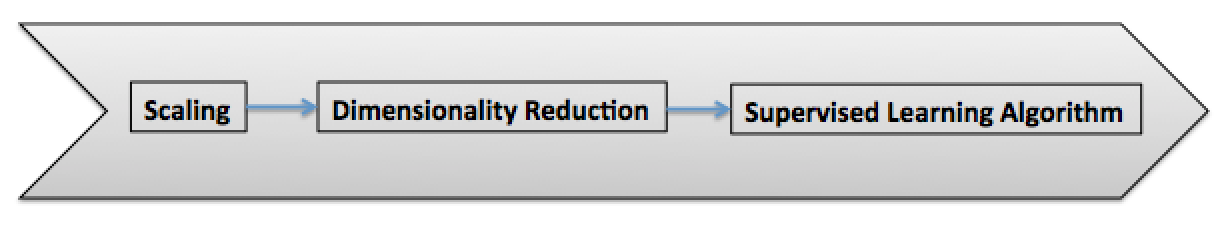

In [0]:
Image(filename='./gdrive/My Drive/Colab Notebooks/Programming_Session_1/images/Pipeline.png',  width=1000) 

## Import basic libraries

In [0]:
import pandas as pd # for manipulating dataframes
import matplotlib.pyplot as plt # for plotting 
import numpy as np # for manipulating arrays
import sklearn # for creating Machine Learning Models 
import tensorflow as tf # for creating Neural Networks, we will use it to load data


## Loading the MNIST dataset
Each MNIST image is a 2 dimensional vector of shape (28, 28), which we can flatten into a vector of 784 integers between 0-255 representing the intensity of a pixel. 

What is the Shape of the training data ?

(60000, 28, 28)

Plot the first training data

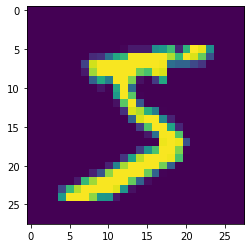

Reshape all the images into 784 dimensional vectors 

What's the new shape of the training data ? 

(60000, 784)

What's the new shape of the test data ? 

(10000, 784)

Rescale training and test data by dividing by 255

## Unsupervised Learning 

In this section, we want to reduce the dimensionality from 784 to 2 dimensions in order to visualise it in a scatter plot

In [0]:
# Import the Unsupervised Model called PCA

# The model is called pca

# Fit the pca model on the train data and transform it 

# Now that the model has been trained, transform the test data


What's the new shape of the training and test data ? 

(60000, 2)

(10000, 2)

Let's visualise it in a scatter plot

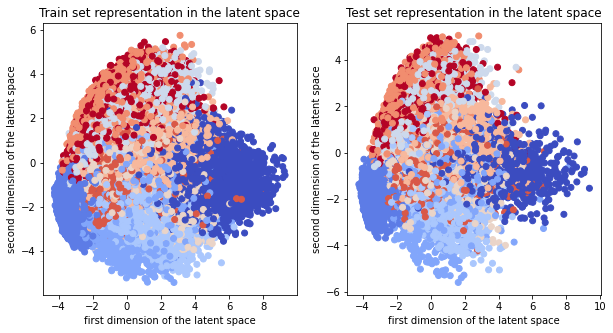

In [0]:
from matplotlib.cm import coolwarm

fig = plt.figure(figsize=(10, 5))
for fid_idx, (x, y, title) in enumerate(
            zip([X_train_reduced, X_test_reduced], [y_train, y_test], ['Train', 'Test'])):
    ax = fig.add_subplot(1, 2, fid_idx + 1)
    ax.scatter(x[:, 0], x[:, 1], c = y, cmap=coolwarm)
    ax.set_xlabel("first dimension of the latent space")
    ax.set_ylabel("second dimension of the latent space")
    ax.set_title("{} set representation in the latent space".format(title))
plt.show()

## Combining transformers and classifiers in a pipeline

In [0]:
# Import Modules 
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Create the model by combining pca (Transform data) -> RandomForest(Predict output)

# Fit the model 

# Evaluate the Model on train and test data

# Predict the targets of the test data


Train Accuracy: 0.971
Test Accuracy: 0.416


# Fine-tuning the models via grid search

## Model Performance using K-fold cross validation

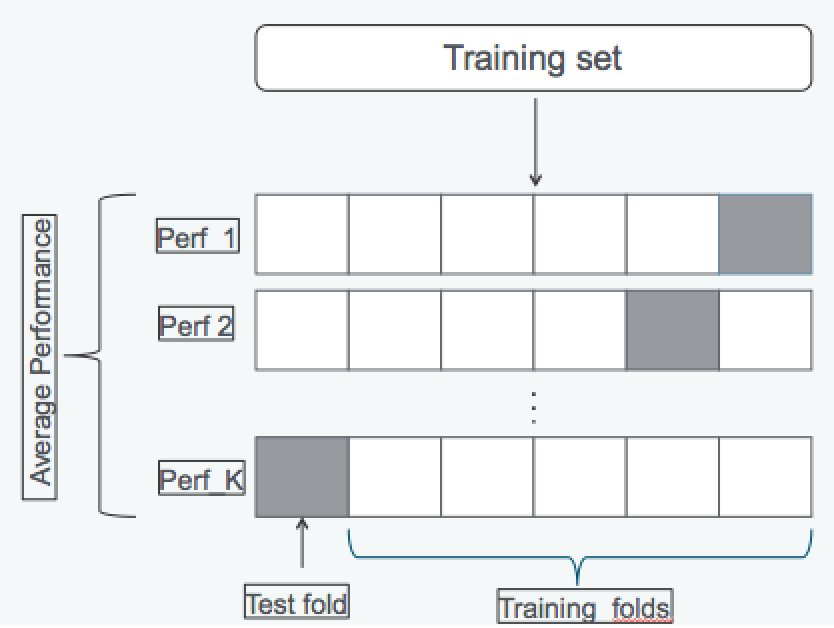

In [0]:
Image(filename='./gdrive/My Drive/Colab Notebooks/Programming_Session_1/images/Kfold.png',  width=500) 

In [0]:
# Import cross validation method
from sklearn.model_selection import cross_val_score

# Apply the cross validation to train data and get the performances


# Print Cross Validation Accuracy Score on the test set 



## Optimizing Hyperparameters using grid search

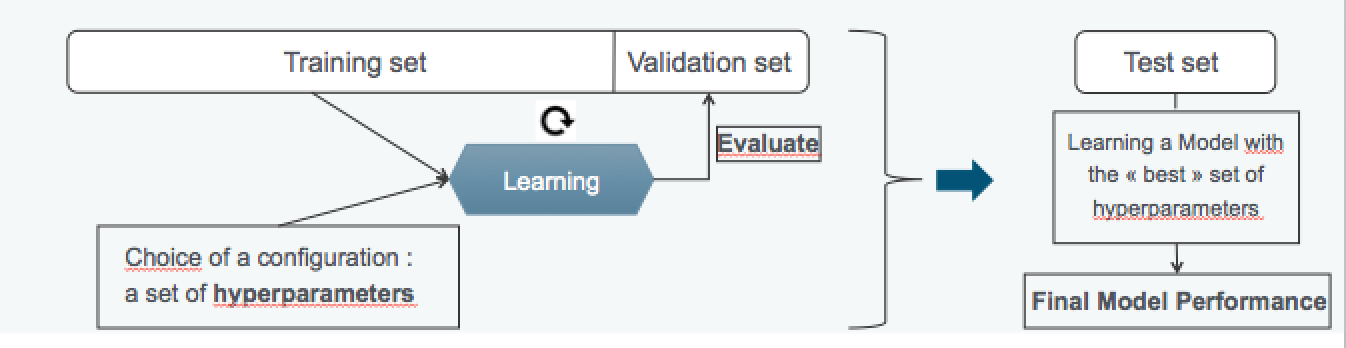

In [0]:
Image(filename='./gdrive/My Drive/Colab Notebooks/Programming_Session_1/images/GS.png',  width=1000) 

In [0]:
# Import Modules 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create a default model


# Create a list of choices for each hyperparameter


# Create the grid of possible combinations 


# Prepare the Grid Search Fine Tuning 


# Test all the possible hyperparamters


# The best hyperparameters


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0.9504833333333333
{'clf__n_estimators': 100, 'pca__n_components': 50}


# Evaluation Metrics

## The Test Accuracy

In [0]:
# The final model is the one with the best hyperparameters


Test accuracy: 0.955


## The confusion matrix

In [0]:
# Import module 
from sklearn.metrics import confusion_matrix

# Predict the test data using the best model

# Create the confusion matrix 



[[ 963    0    2    0    0    5    8    1    1    0]
 [   0 1120    2    4    0    0    5    0    3    1]
 [   8    0  974   11    6    2    3    9   19    0]
 [   2    0    7  957    1    9    1    8   20    5]
 [   1    0    5    0  936    4    9    1    5   21]
 [   5    1    3   17    4  847    5    2    5    3]
 [   8    4    1    1    4    4  935    0    1    0]
 [   0    5   20    3    5    0    0  972    0   23]
 [   6    0    6   16    6   20    4    8  901    7]
 [   5    5    2   12   22    5    1   13   12  932]]


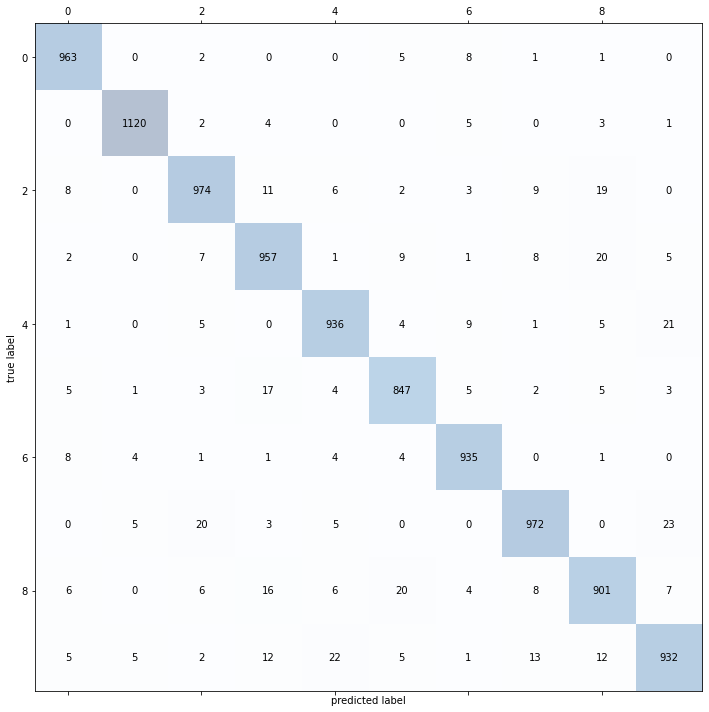

In [0]:
# Plot the confusion matrix in a fancy way 
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
plt.show()

# Summary

In this programming session, we've learned the best practices of building good maching learning models, which can be summerized as follows: 


*   Preprocessing the data
*   Creating Pipelines combining unsupervised and supervised algorithms 
* Fine-Tuning the machine learning models.
* Evaluating the final model using different performance metrics. 



